# **NLP Project for Disaster Tweet Classification**

### Objectives

- **Classification Model Development**:
  - Develop a machine learning model that predicts whether a tweet is related to a real disaster or not.
  
- **Accuracy and Precision**:
  - Aim for high accuracy and precision in the classification process to minimize false alarms.
  - Ensure the model provides timely and accurate disaster detection.

- **Robustness**:
  - Design the model to handle variations in language, including slang, abbreviations, and cultural nuances.
  - Ensure the model performs well across diverse tweet datasets, maintaining effectiveness in real-world scenarios.

- **Scalability**:
  - Build a scalable solution capable of processing large volumes of tweets in real-time.
  - Support continuous monitoring efforts for disaster alerts in dynamic, high-volume environments.


## **Task: Data Exploration**

In [120]:
# import Libraries
import pandas as pd 
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from bs4 import BeautifulSoup
import seaborn as sns
from wordcloud import WordCloud
import string
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91860/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [121]:
#Load the Dataset
data=pd.read_csv('C:/data science material/project_7/Notebook/data/twitter_disaster.csv')
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [122]:
df=data[['text','target']]
df

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


In [123]:
#List of keywords 
keywords = df['text'].nunique()
print(keywords)

7503


In [124]:
#check the shape of data
df.shape

(7613, 2)

In [125]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7613 non-null   object
 1   target  7613 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.1+ KB


In [126]:
# Display descriptive statistics for numerical columns
df.describe()

,target
count,7613.00000
mean,0.42966
std,0.49506
min,0.00000
25%,0.00000
50%,0.00000
75%,1.00000
max,1.00000


In [127]:
#missing values
df.isnull().sum()


text      0
target    0
dtype: int64

In [128]:
#checking for balance or imbalance dataset
df['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

data is balanced

In [129]:
#1.lower all cases
df['text']=df['text'].str.lower()

C:\Users\91860\AppData\Local\Temp\ipykernel_3644\1812506964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text']=df['text'].str.lower()


In [130]:
df.head()

,text,target
0,our deeds are the reason of this #earthquake m...,1
1,forest fire near la ronge sask. canada,1
2,all residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,just got sent this photo from ruby #alaska as ...,1


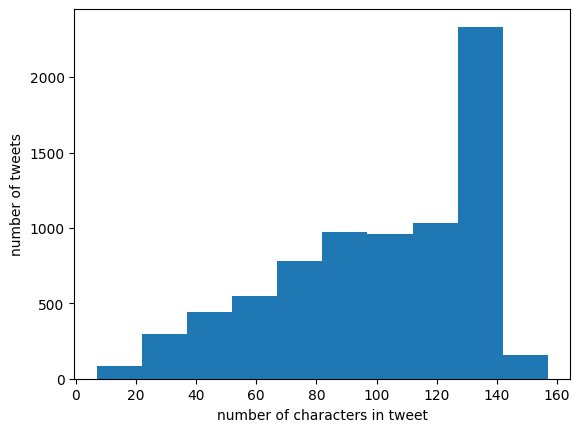

In [131]:
# length of tweets in characters

plt.hist(df.text.str.len())
plt.xlabel('number of characters in tweet')
plt.ylabel('number of tweets')
plt.show()

The histogram shows that most tweets are between 100 and 140 characters in length, with a large peak near the 140-character mark. There is a noticeable drop in the number of tweets as the character count decreases, suggesting that longer tweets are more common in this dataset. This could indicate that users are generally utilizing the full character limit allowed by platforms.

C:\Users\91860\AppData\Local\Temp\ipykernel_3644\1904386315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['words'] = df.text.str.split()
C:\Users\91860\AppData\Local\Temp\ipykernel_3644\1904386315.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['numberOfWords'] = df.text.str.split().map(lambda x: len(x))


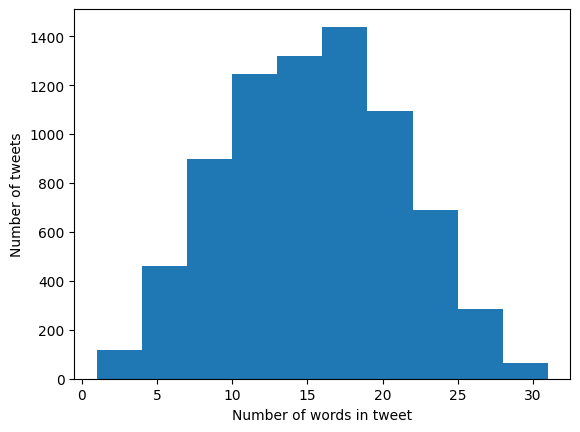

In [132]:
# Length of tweets in words
df['words'] = df.text.str.split()
df['numberOfWords'] = df.text.str.split().map(lambda x: len(x))
df['numberOfWords'].hist()
plt.xlabel("Number of words in tweet")
plt.ylabel("Number of tweets")
plt.grid(visible=False)
plt.show()

The histogram indicates that most tweets contain between 10 and 20 words, with the highest frequency of tweets having around 15 words. Fewer tweets have fewer than 5 words, and very few exceed 30 words, suggesting that most tweets are concise, with a moderate range of word counts.

C:\Users\91860\AppData\Local\Temp\ipykernel_3644\1430834514.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target',data=df, palette='viridis')


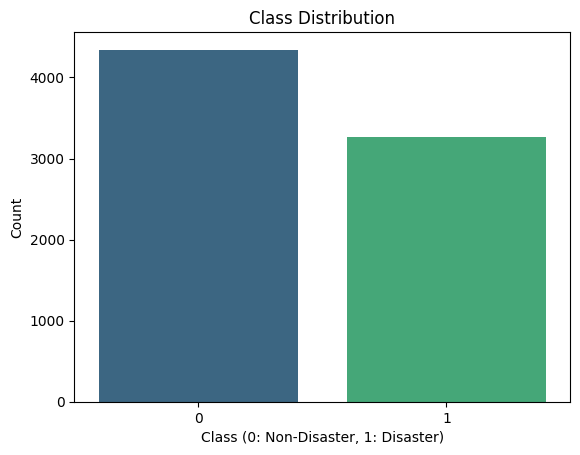

In [133]:
# Class distribution
sns.countplot(x='target',data=df, palette='viridis')
plt.title("Class Distribution")
plt.xlabel("Class (0: Non-Disaster, 1: Disaster)")
plt.ylabel("Count")
plt.show()

#### Interpretation:
- **Non-Disaster Tweets (Class 0)**: The bar for non-disaster tweets is much larger, indicating that there are significantly more non-disaster tweets in the dataset.
- **Disaster Tweets (Class 1)**: The bar for disaster tweets is smaller, showing that there are fewer tweets related to disasters.

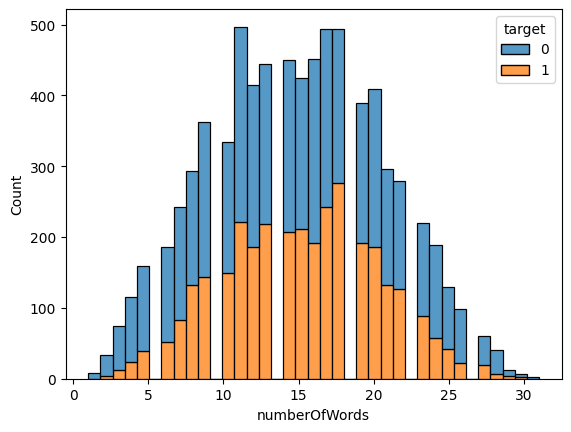

In [134]:
# Length of tweets in words per target
sns.histplot(data=df, x='numberOfWords', hue='target', multiple='stack')
plt.show()

In [135]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\91860/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

- 0--> non disaster
- 1--> disaster

**Analyze the frequency of keywords and phrases associated with disaster tweets**

In [136]:
# Filter disaster-related tweets
disaster_tweets = df[df['target'] == 1]

In [137]:
# Join all disaster tweet text into one large string
disaster_text = " ".join(tweet for tweet in disaster_tweets['text'])# Join all disaster tweet text into one large string

In [138]:
# Create a word cloud to visualize the most frequent words in disaster tweets
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(disaster_text)

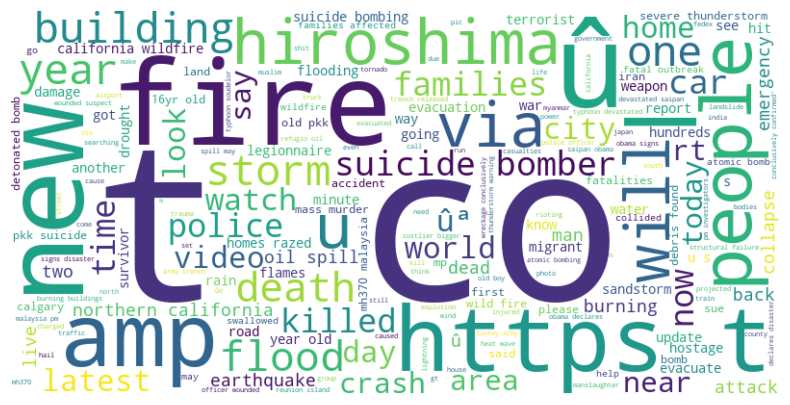

In [139]:
# Plot the word cloud
plt.figure(figsize=(10, 5))  # Set the figure size (width x height in inches)
plt.imshow(wordcloud, interpolation="bilinear")  # Render the word cloud image
plt.axis("off")  # Remove axes for better visualization
plt.show()  # Display the word cloud

**Word Cloud Interpretation**
- The word cloud visualizes the most frequent terms in the dataset. Larger words, such as **"fire"**, **"people"**, **"flood"**, **"death"**, and **"Hiroshima"**, are commonly associated with disaster-related events.

same for non-disaster tweets by filtering the dataset where target == 0 and generating a word cloud for non-disaster tweets.

In [140]:
# Filter non-disaster-related tweets
non_disaster_tweets = df[df['target'] == 0]

In [141]:
# Join all non-disaster tweet text into one large string
non_disaster_text = " ".join(tweet for tweet in non_disaster_tweets['text'])

In [142]:
# Create a word cloud for non-disaster tweets
wordcloud_non_disaster = WordCloud(width=800, height=400, background_color="white").generate(non_disaster_text)

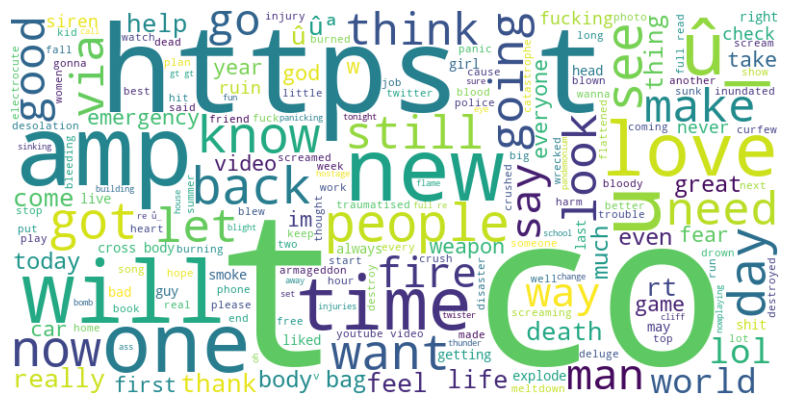

In [143]:
# Plot the word cloud for non-disaster tweets
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_non_disaster, interpolation="bilinear") #Bilinear interpolation calculates the value of a pixel based on a weighted average of its nearest neighbors, resulting in smoother transitions between colors and shapes.
plt.axis("off")
plt.show()

### Word Cloud Analysis
- **Key Findings:**
- **Mix of Positive and Concerning Terms**: The word cloud shows a combination of **positive** words like "love" and "good," alongside more **concerning** terms such as "weapon" and "fear."
- **Indicates Online Community Content**: The presence of both **positive** and **negative** terms suggests the data may be related to online community content or social media comments.
- **High Emotional Engagement**: The mix of emotional terms indicates **high emotional engagement** in the content, reflecting the intensity of discussions or reactions.

## **Data Preparation**

In [144]:
## Data Cleaning And Preprocessing
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91860/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [145]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [146]:
corpus=[]
for i in range(0,len('text')):
    review=re.sub('[^a-zA-z]',' ',df['text'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [147]:
corpus

['deed reason earthquak may allah forgiv us',
 'forest fire near la rong sask canada',
 'resid ask shelter place notifi offic evacu shelter place order expect',
 'peopl receiv wildfir evacu order california']

In [148]:
def data_cleaning(words):
    words = str(words).lower()  # Convert all text to lowercase
    words = re.sub('', '', words)  # Redundant: Removes nothing; this line can be removed
    words = re.sub('https?://\S+|www\.\S+', '', words)  # Remove URLs starting with http, https, or www
    words = re.sub('<.*?>+', '', words)  # Remove HTML tags like <p>, <a>, etc.
    words = re.sub('[%s]' % re.escape(string.punctuation), '', words)  # Remove all punctuation marks
    words = re.sub('\n', '', words)  # Remove newline characters
    words = re.sub('\w*\d\w*', '', words)  # Remove words containing digits, e.g., "word123"
    words = [word for word in words.split(' ') if word not in stopword]  # Remove stopwords from tokenized words
    words = " ".join(words)  # Rejoin the filtered words into a single string
    words = [stemmer.stem(word) for word in words.split(' ')]  # Apply stemming to each word
    words = " ".join(words)  # Rejoin stemmed words into a single string

    return words  # Return the cleaned and processed text


<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\w'
C:\Users\91860\AppData\Local\Temp\ipykernel_3644\801405773.py:4: SyntaxWarning: invalid escape sequence '\S'
  words = re.sub('https?://\S+|www\.\S+', '', words)  # Remove URLs starting with http, https, or www
C:\Users\91860\AppData\Local\Temp\ipykernel_3644\801405773.py:8: SyntaxWarning: invalid escape sequence '\w'
  words = re.sub('\w*\d\w*', '', words)  # Remove words containing digits, e.g., "word123"


In [149]:
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Initialize stopwords
stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91860/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [150]:
df['text'][1]

'forest fire near la ronge sask. canada'

In [151]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
# let's apply the data_cleaning on the data.
df['text']=df['text'].apply(data_cleaning)

C:\Users\91860\AppData\Local\Temp\ipykernel_3644\2477043556.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text']=df['text'].apply(data_cleaning)


In [152]:
df['text']

0               deed reason earthquak may allah forgiv us
1                    forest fire near la rong sask canada
2       resid ask shelter place notifi offic evacu she...
3            peopl receiv wildfir evacu order california 
4       got sent photo rubi alaska smoke wildfir pour ...
                              ...                        
7608      two giant crane hold bridg collaps nearbi home 
7609    ariaahrari thetawniest control wild fire calif...
7610                                      volcano hawaii 
7611    polic investig ebik collid car littl portug eb...
7612    latest home raze northern california wildfir  ...
Name: text, Length: 7613, dtype: object

In [153]:
x = df['text']
y = df['target']

In [154]:
x

0               deed reason earthquak may allah forgiv us
1                    forest fire near la rong sask canada
2       resid ask shelter place notifi offic evacu she...
3            peopl receiv wildfir evacu order california 
4       got sent photo rubi alaska smoke wildfir pour ...
                              ...                        
7608      two giant crane hold bridg collaps nearbi home 
7609    ariaahrari thetawniest control wild fire calif...
7610                                      volcano hawaii 
7611    polic investig ebik collid car littl portug eb...
7612    latest home raze northern california wildfir  ...
Name: text, Length: 7613, dtype: object

In [155]:
# Let's split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 42)

print(len(x_train),len(y_train))
print(len(x_test),len(y_test))

5709 5709
1904 1904


**Lemmatization** transforms words into their base or root forms (e.g., "running" → "run"). This reduces the vocabulary size without losing semantic meaning, making the text easier to analyze.

In [156]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize lemmatizer and stopwords
lem = WordNetLemmatizer()
stopwords = set(nltk.corpus.stopwords.words('english'))

def preprocess_text(df: pd.DataFrame) -> pd.DataFrame:
    try:
        # Ensure 'text' column exists
        if 'text' not in df.columns:
            raise KeyError("'text' column not found in the DataFrame.")

        # Convert text to lowercase
        df['text'] = df['text'].astype(str).str.lower()

        # Tokenize the text
        df['tokenized_words'] = df['text'].apply(word_tokenize)

        # Remove non-alphabetic tokens, stopwords, and specific unwanted tokens
        unwanted_tokens = {'amp', 'http', 'https'}
        df['tokenized_words'] = df['tokenized_words'].apply(
            lambda lst: [
                w for w in lst if w.isalpha() and w not in stopwords and w not in unwanted_tokens
            ]
        )

        # Lemmatize the tokens
        df['lemmatized_words'] = df['tokenized_words'].apply(
            lambda lst: [lem.lemmatize(w) for w in lst if len(w) > 1]
        )

        return df
    except KeyError as e:
        print(f"KeyError: {e}")
    except AttributeError as e:
        print(f"AttributeError: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

def join_words(text):
    return " ".join(text)

# Ensure 'df' contains necessary columns
if 'text' in df.columns and 'target' in df.columns:
    # Split the dataset into train and validation sets
    X = df.drop('target', axis=1)
    y = df['target']
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

    # Combine X and y back into dataframes
    train2_df = df.loc[X_train.index]
    val_df = df.loc[X_val.index]

    # Preprocess the training data
    train2_df = preprocess_text(train2_df)

    # Create a clean_text column by joining lemmatized words
    train2_df['clean_text'] = train2_df['lemmatized_words'].apply(join_words)

    # Display the first few rows of the processed DataFrame
    display(train2_df.head())
else:
    print("The DataFrame must contain 'text' and 'target' columns.")  

[nltk_data] Downloading package punkt to C:\Users\91860/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\91860/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91860/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,target,words,numberOfWords,tokenized_words,lemmatized_words,clean_text
3764,there fire catalina look kinda cool pictur doe...,1,"[there's, a, fire, in, the, catalinas., looks,...",16,"[fire, catalina, look, kinda, cool, pictur, do...","[fire, catalina, look, kinda, cool, pictur, do...",fire catalina look kinda cool pictur doesnt ju...
3368,veldfest announc refund day two extrem weathe...,1,"[., @veldfest, announces, refunds, after, day,...",12,"[veldfest, announc, refund, day, two, extrem, ...","[veldfest, announc, refund, day, two, extrem, ...",veldfest announc refund day two extrem weather...
994,bomairing elutranscend straight bodi bag,0,"[@bomairinge, @elutranscendent, straight, body...",5,"[bomairing, elutranscend, straight, bodi, bag]","[bomairing, elutranscend, straight, bodi, bag]",bomairing elutranscend straight bodi bag
1988,complain phoenix mode fire emblem turn ray gig...,0,"[and, here, i, was, complaining, about, phoeni...",25,"[complain, phoenix, mode, fire, emblem, turn, ...","[complain, phoenix, mode, fire, emblem, turn, ...",complain phoenix mode fire emblem turn ray gig...
765,iphooey time iron michel bachmann brought wro...,0,"[@iphooey, @time, ironically, michele, bachman...",24,"[iphooey, time, iron, michel, bachmann, brough...","[iphooey, time, iron, michel, bachmann, brough...",iphooey time iron michel bachmann brought wron...


**Lemmatization** transforms words into their base or root forms (e.g., "running" → "run"). This reduces the vocabulary size without losing semantic meaning, making the text easier to analyze.

In [157]:
# Assuming 'train2_df' contains the cleaned data with 'clean_text' column
cleaned_data_df = train2_df[['clean_text', 'target']]  # Select 'clean_text' and 'target' columns

# Display the cleaned data
print(cleaned_data_df.head())

# save it to a CSV file 
cleaned_data_df.to_csv('cleaned_data.csv', index=False)


                                             clean_text  target
3764  fire catalina look kinda cool pictur doesnt ju...       1
3368  veldfest announc refund day two extrem weather...       1
994            bomairing elutranscend straight bodi bag       0
1988  complain phoenix mode fire emblem turn ray gig...       0
765   iphooey time iron michel bachmann brought wron...       0


In [158]:
x

0               deed reason earthquak may allah forgiv us
1                    forest fire near la rong sask canada
2       resid ask shelter place notifi offic evacu she...
3            peopl receiv wildfir evacu order california 
4       got sent photo rubi alaska smoke wildfir pour ...
                              ...                        
7608      two giant crane hold bridg collaps nearbi home 
7609    ariaahrari thetawniest control wild fire calif...
7610                                      volcano hawaii 
7611    polic investig ebik collid car littl portug eb...
7612    latest home raze northern california wildfir  ...
Name: text, Length: 7613, dtype: object

In [159]:
y

0       1
1       1
2       1
3       1
4       1
       ..
7608    1
7609    1
7610    1
7611    1
7612    1
Name: target, Length: 7613, dtype: int64

## **Feature Engineering**

**1. Term Frequency-Inverse Document Frequency (TF-IDF)**

Objective: Convert text into numerical representations using TF-IDF.

In [160]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform data
X_train_tfidf = tfidf.fit_transform(x_train)

# Show the TF-IDF features of the training data
print("TF-IDF representation of training data:")
print(X_train_tfidf.toarray())  # Converting the sparse matrix to a dense format for display
print("Feature names:", tfidf.get_feature_names_out())  # Show the words corresponding to the TF-IDF features



TF-IDF representation of training data:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Feature names: ['aa' 'ab' 'aba' ... 'ûóbbc' 'ûóher' 'ûókodi']


**2. Bag of Words (BoW)**

In [161]:
# Initialize the CountVectorizer (BoW model)
vectorizer = CountVectorizer()

# Fit the model on the training data and transform it
X_train_bow = vectorizer.fit_transform(x_train)

# Show the BoW representation of the training data
print("Bag of Words representation of training data:")
print(X_train_bow.toarray())  # Convert the sparse matrix to a dense format for display
print("Feature names (words corresponding to the columns):", vectorizer.get_feature_names_out())

Bag of Words representation of training data:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Feature names (words corresponding to the columns): ['aa' 'aaaa' 'aaaaaaallll' ... 'ûókodi' 'ûótech' 'ûów']


**3. N-grams Feature Extraction**

N-grams are continuous sequences of n items (words, characters) from a given sample of text.

In [162]:
# Initialize the CountVectorizer with n-grams
vectorizer = CountVectorizer(ngram_range=(2, 2))

# Fit and transform the data
X_train_ngram = vectorizer.fit_transform(x_train)

# Show the N-gram representation
print("N-grams representation of training data:")
print(X_train_ngram.toarray())  # Convert sparse matrix to dense for visualization
print("Feature names (N-grams):", vectorizer.get_feature_names_out())


N-grams representation of training data:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Feature names (N-grams): ['aa ayyo' 'aa batteri' 'aaaa ok' ... 'ûókodi vine' 'ûótech busi'
 'ûów work']


**Wordnet Lemmatizer**
Lemmatization technique is like stemming. The output we will get after lemmatization is called ‘lemma’, which is a root word rather than root stem, the output of stemming. After lemmatization, we will be getting a valid word that means the same thing.

NLTK provides WordNetLemmatizer class which is a thin wrapper around the wordnet corpus. This class uses morphy() function to the WordNet CorpusReader class to find a lemma. Let us understand it with an example −

**4. Word Embeddings (Using Pre-trained Models)**
Word embeddings like GloVe and Word2Vec represent words as vectors in a continuous space. These embeddings capture the semantic meaning of words, and the models are pre-trained on large text corpora. You can use these embeddings for your NLP tasks.

**5. Word2Vec Embeddings**

In [163]:
import gensim
from gensim.models import Word2Vec

# Train a Word2Vec model
model = Word2Vec(cleaned_data_df, vector_size=50, window=5, min_count=1, workers=4)

# Save the model
model.save("word2vec.model")


## **Model Selection and Training**

Logistic Regression Accuracy: 0.8128693368351937
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.79      0.91      0.85       869
           1       0.85      0.68      0.76       654

    accuracy                           0.81      1523
   macro avg       0.82      0.80      0.80      1523
weighted avg       0.82      0.81      0.81      1523



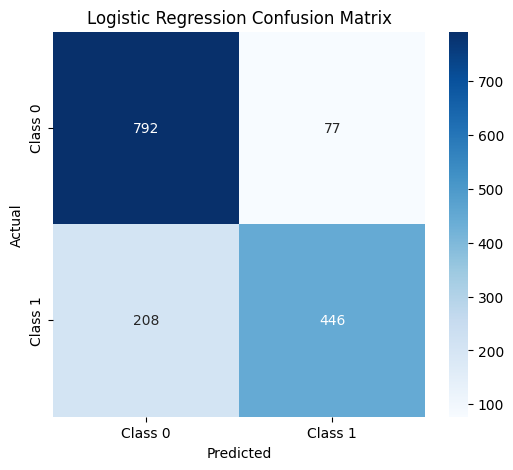

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' contains the 'text' and 'target' columns
X = df['text']  # Feature column
y = df['target']  # Target column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Apply TfidfVectorizer to the text data
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Function to plot confusion matrix
def plot_cm(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000)  # Added max_iter to ensure convergence
lr_model.fit(X_train_tfidf, y_train)

# Predictions
lr_preds = lr_model.predict(X_test_tfidf)

# Accuracy and Classification Report
lr_accuracy = accuracy_score(y_test, lr_preds)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Report:\n", classification_report(y_test, lr_preds))

# Plot confusion matrix
plot_cm(y_test, lr_preds, "Logistic Regression Confusion Matrix")


In [165]:
print(X_train_tfidf.shape, y_train.shape)
print(X_test_tfidf.shape, y_test.shape)

(6090, 11825) (6090,)
(1523, 11825) (1523,)


In [166]:
from sklearn.ensemble import RandomForestClassifier


Random Forest Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83       869
           1       0.81      0.67      0.73       654

    accuracy                           0.79      1523
   macro avg       0.80      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523



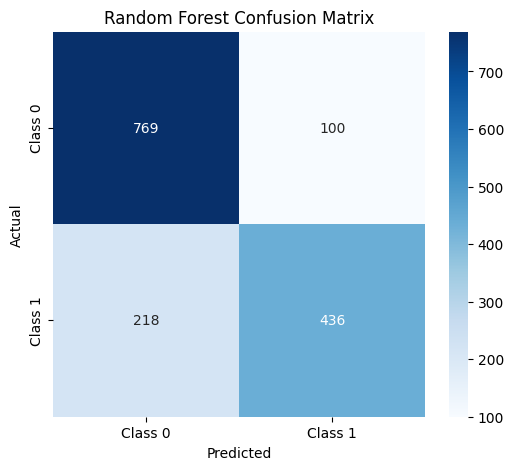

In [167]:
# Train Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, y_train)
rf_preds = rf_model.predict(X_test_tfidf)
rf_accuracy = accuracy_score(y_test, rf_preds)
print("Random Forest Report:\n", classification_report(y_test, rf_preds))
plot_cm(y_test, rf_preds, "Random Forest Confusion Matrix")


XGBoost Report:
               precision    recall  f1-score   support

           0       0.76      0.89      0.82       869
           1       0.81      0.62      0.70       654

    accuracy                           0.78      1523
   macro avg       0.79      0.76      0.76      1523
weighted avg       0.78      0.78      0.77      1523



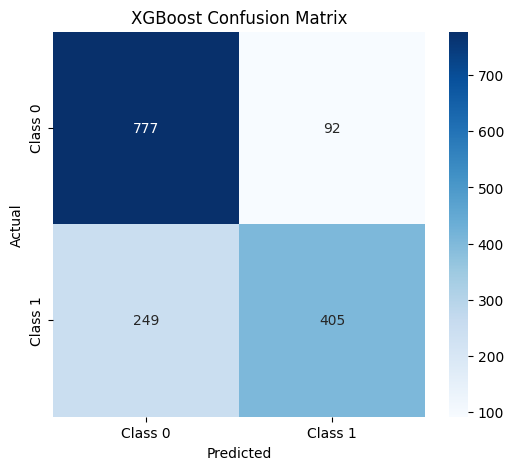

In [170]:
from xgboost import XGBClassifier

# Train XGBoost
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train_tfidf, y_train)
xgb_preds = xgb_model.predict(X_test_tfidf)
xgb_accuracy = accuracy_score(y_test, xgb_preds)
print("XGBoost Report:\n", classification_report(y_test, xgb_preds))
plot_cm(y_test, xgb_preds, "XGBoost Confusion Matrix")

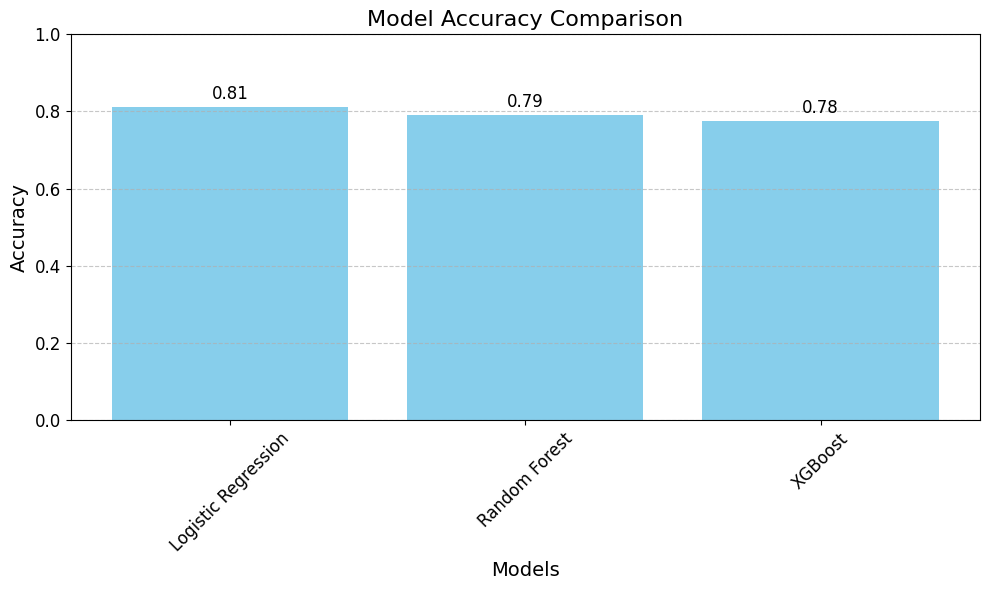

In [ ]:

# Define the function to plot accuracy comparison
def plot_accuracy_comparison(models, scores):
    """
    Plots a bar chart to compare model accuracies.

    Parameters:
    models (list): List of model names as strings.
    scores (list): List of corresponding accuracy scores.

    Returns:
    None
    """
    plt.figure(figsize=(10, 6))
    plt.bar(models, scores, color='skyblue')
    plt.title('Model Accuracy Comparison', fontsize=16)
    plt.xlabel('Models', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
    for i, score in enumerate(scores):
        plt.text(i, score + 0.02, f"{score:.2f}", ha='center', fontsize=12, color='black')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Compare accuracies of models
try:
    # Model names and corresponding accuracy scores
    models = ['Logistic Regression', 'Random Forest', 'XGBoost']
    scores = [lr_accuracy, rf_accuracy, xgb_accuracy]  # Ensure these variables are defined

    # Plot the accuracy comparison
    plot_accuracy_comparison(models, scores)
except NameError as e:
    print(f"Error: {e}")
    print("Ensure all accuracy scores (lr_accuracy, rf_accuracy, xgb_accuracy) are defined.")


- logistic regression has  the highest accuracy among the models, indicating its superior performance.  
- Random Forest performs slightly lower than XGBoost but better than Logistic Regression.  
- Xgboost has the lowest accuracy, suggesting it may not handle the dataset's complexity well.  


## **Model Evaluation and Validation**

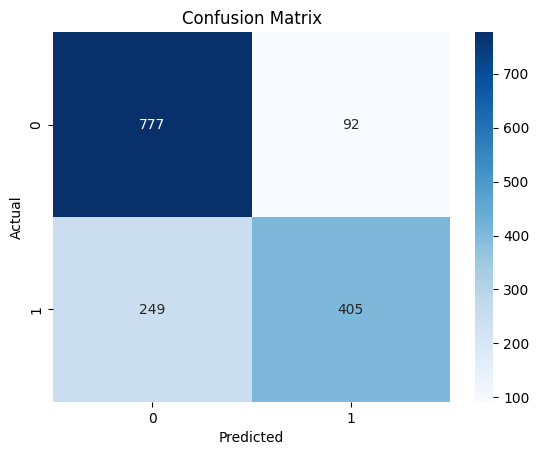

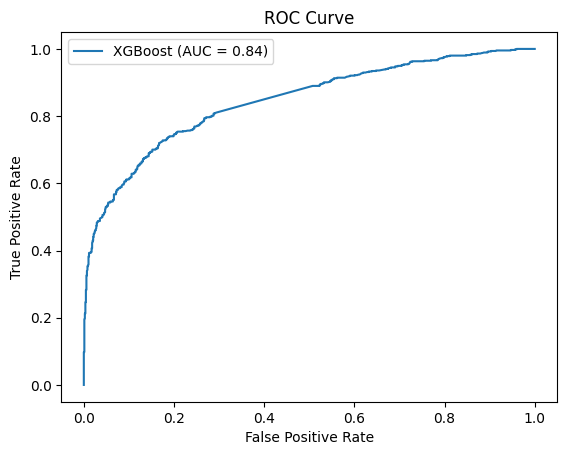

In [173]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# Confusion Matrix for XGBoost
conf_matrix = confusion_matrix(y_test, xgb_preds)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, xgb_model.predict_proba(X_test_tfidf)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc:.2f})")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


The ROC curve shows the performance of the XGBoost model.  
The True Positive Rate (TPR) is plotted against the False Positive Rate (FPR).  
The model has an AUC of 0.84, indicating good classification performance.  
AUC values closer to 1 suggest a stronger model.


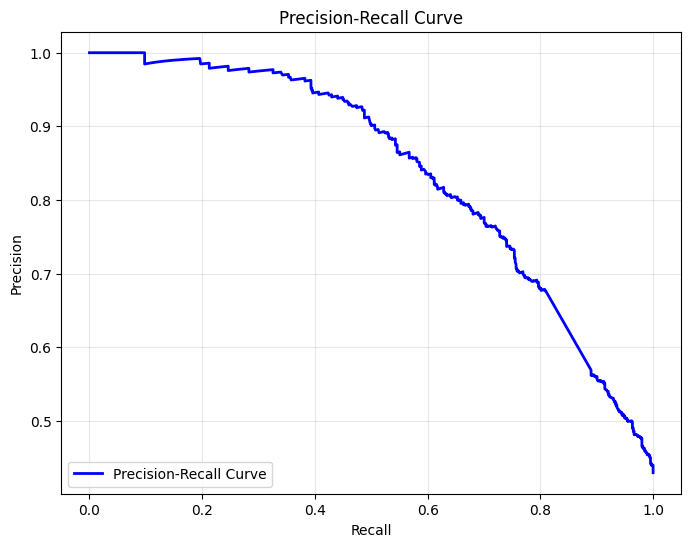

In [174]:
from sklearn.metrics import precision_recall_curve

# Precision-Recall Curve
y_scores = xgb_model.predict_proba(X_test_tfidf)[:, 1]  # Predicted probabilities for the positive class
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label="Precision-Recall Curve")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.show()



The Precision-Recall curve illustrates the trade-off between precision and recall for the XGBoost model.  
As recall increases, precision decreases, which is typical in imbalanced datasets.  
A higher area under the curve (AUC) indicates better model performance in distinguishing positive cases.


In [177]:
model_scores = {
    'Logistic Regression': lr_accuracy,
    'Random Forest': rf_accuracy,
    'XGBoost': xgb_accuracy
}

# Create DataFrame from the model_scores dictionary
model_df = pd.DataFrame(list(model_scores.items()), columns=['Model', 'Accuracy'])

# Display the DataFrame
model_df


,Model,Accuracy
0,Logistic Regression,0.812869
1,Random Forest,0.791202
2,XGBoost,0.776100


### Conclusion:
Based on the accuracy comparison of the models:
1. **Logistic Regression** achieved the highest accuracy of **0.8129**, indicating that it performs well in this scenario, likely due to the data's linear separability.
2. **Random Forest** achieved an accuracy of **0.7912**, performing slightly worse than Logistic Regression but leveraging its ensemble method to handle data variability.
3. **XGBoost** had the lowest accuracy of **0.7761**, which is unexpected given its usual high performance. This may indicate a need for hyperparameter tuning or adjustments to better fit the data.

**1. Define the Hyperparameter Grid**

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Hyperparameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression Accuracy (Tuned): 0.8023637557452397
Logistic Regression Classification Report (Tuned):
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       869
           1       0.82      0.69      0.75       654

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523



c:\data science material\project_7\venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
225 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "c:\data science material\project_7\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\data science material\project_7\venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\data science material\project_7\venv\Lib\site-packages\sklear

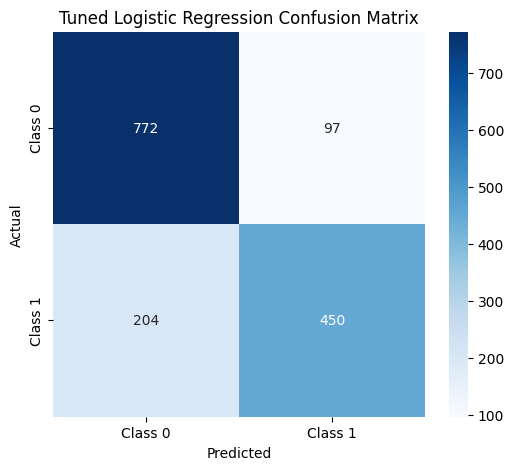

In [ ]:
# 1. **Define the Hyperparameter Grid for Logistic Regression**
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],  # Regularization techniques
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength (inverse of regularization)
    'solver': ['liblinear', 'saga'],  # Solvers compatible with l1 and elasticnet
    'max_iter': [100, 200, 500]  # Maximum number of iterations for convergence
}



# 3. **Perform Hyperparameter Search**
grid_search.fit(X_train_tfidf, y_train)

# 4. **Get the Best Hyperparameters**
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# 5. **Train the Best Model**
best_lr_model = grid_search.best_estimator_

# 6. **Make Predictions and Evaluate the Model**
lr_preds = best_lr_model.predict(X_test_tfidf)

# Accuracy and Classification Report
lr_accuracy = accuracy_score(y_test, lr_preds)
print("Logistic Regression Accuracy (Tuned):", lr_accuracy)
print("Logistic Regression Classification Report (Tuned):\n", classification_report(y_test, lr_preds))

# Plot confusion matrix for the tuned model
plot_cm(y_test, lr_preds, "Tuned Logistic Regression Confusion Matrix")


In [183]:
import pickle


In [184]:
# Save the best Logistic Regression model (tuned)
with open("best_logistic_model.pkl", "wb") as model_file:
    pickle.dump(best_lr_model, model_file)
    print("Best Logistic Regression model saved!")

# Save the TfidfVectorizer used to transform the text data
with open("tfidf_vectorizer.pkl", "wb") as vectorizer_file:
    pickle.dump(tfidf_vectorizer, vectorizer_file)
    print("TfidfVectorizer saved!")


Best Logistic Regression model saved!
TfidfVectorizer saved!


In [185]:
# Load the saved Logistic Regression model
with open("best_logistic_model.pkl", "rb") as model_file:
    loaded_model = pickle.load(model_file)
    print("Model loaded!")

# Load the saved TfidfVectorizer
with open("tfidf_vectorizer.pkl", "rb") as vectorizer_file:
    loaded_vectorizer = pickle.load(vectorizer_file)
    print("TfidfVectorizer loaded!")


Model loaded!
TfidfVectorizer loaded!


In [186]:
# New text data to predict
input_text = "This is an example of new text data"

# Transform the text data to TF-IDF features using the loaded vectorizer
input_tfidf = loaded_vectorizer.transform([input_text])

# Make prediction using the loaded model
prediction = loaded_model.predict(input_tfidf)

# Output the prediction
print(f"Prediction: Class {prediction[0]}")


Prediction: Class 0
